<a href="https://colab.research.google.com/github/Adi230920/ML-Project---01-Skin-Cancer-Type-Prediction-/blob/main/Trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
model_path = '/content/drive/MyDrive/SkinCancerProject/skin_cancer_new_model.h5'
model = load_model(model_path)

In [9]:
# Load metadata again
metadata_path = '/content/drive/MyDrive/SkinCancerProject/HAM10000_metadata.csv'
skin_df = pd.read_csv(metadata_path)

# Refit the LabelEncoder
le = LabelEncoder()
le.fit(skin_df['dx'])

LabelEncoder()

Saving vasc.png to vasc.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted skin lesion type: vasc


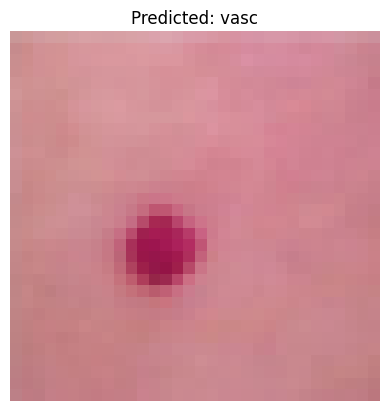

In [17]:
from google.colab import files
uploaded = files.upload()

# Get uploaded filename
img_path = next(iter(uploaded))

# Set image size
SIZE = 32

# Preprocess
img = Image.open(img_path).resize((SIZE, SIZE)).convert('RGB') # Convert to RGB
img_array = np.array(img) / 255.0
img_array = img_array.reshape(1, SIZE, SIZE, 3)

# Predict
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)
class_name = le.inverse_transform([predicted_label])[0]

# Output
print("Predicted skin lesion type:", class_name)
plt.imshow(img)
plt.title(f"Predicted: {class_name}")
plt.axis('off')
plt.show()